Text(0.5, 1.0, 'Original image')

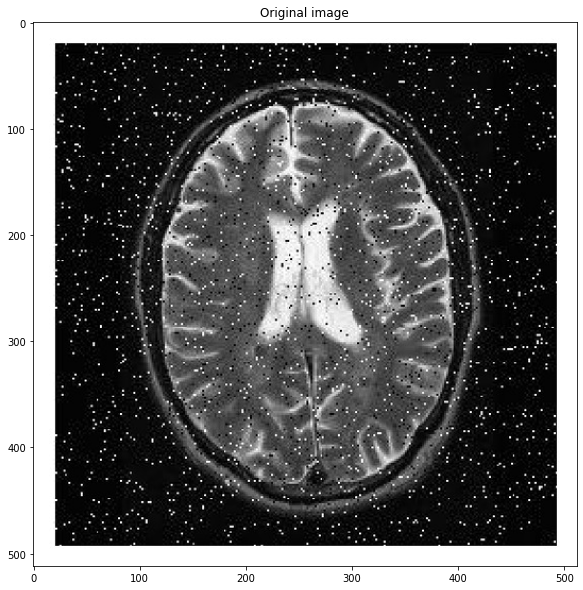

In [1]:
%matplotlib inline
from IPython.display import display, Math, Latex
import cv2
import random
import numpy as numpy
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO
import math
import scipy.ndimage as nd
import pylab


#url = 'https://www.researchgate.net/profile/Zhiwu-Liao/publication/44850068/figure/fig2/AS:305428874448947@1449831326678/Noisy-Lena-a-and-denoised-Lena-using-Wieners-filter-with-77-mask-b.png'
url = 'https://miro.medium.com/max/1074/1*2I9jCD3ZuQd-SUhC21ra8Q.jpeg'
response = requests.get(url)
img = Image.open(BytesIO(response.content)).convert('L')

img.thumbnail((512, 512), Image.ANTIALIAS)

# display the image
figsize = (10,10)
plt.figure(figsize=figsize)

plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.title("Original image")

In [2]:
def enh_alphaTMean(im,alpha,n=5):
    img = numpy.zeros(im.shape,dtype=numpy.int16)
    
    v = int((n-1)/2)
    
    # Calculate the trim coefficient
    b = int((n*n)*(alpha))
    
	# Process the image
    for i in range(0,im.shape[0]):
        for j in range(0,im.shape[1]):
            # Extract the window area
            block = im[max(i-v,0):min(i+v+1,im.shape[0]), max(j-v,0):min(j+v+1,im.shape[1])]

            # Reshape the neighborhood into a vector by flattening the 2D block
            wB = block.flatten()
            
            # Sort the vector into ascending order
            wB = numpy.sort(wB)
            len = wB.size
            
            # Trim b elements from each end of the vector
            if (b != 0):
                nwB = wB[b:len-b]
    
            # Calculate the mean of the trimmed vector
            tMean = nwB.mean()

            # Assign the values
            if (tMean > 0):
                img[i][j] = int(tMean)
    return img

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: Mean of empty slice.
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Text(0.5, 1.0, 'After A-trimmed mean Filtering')

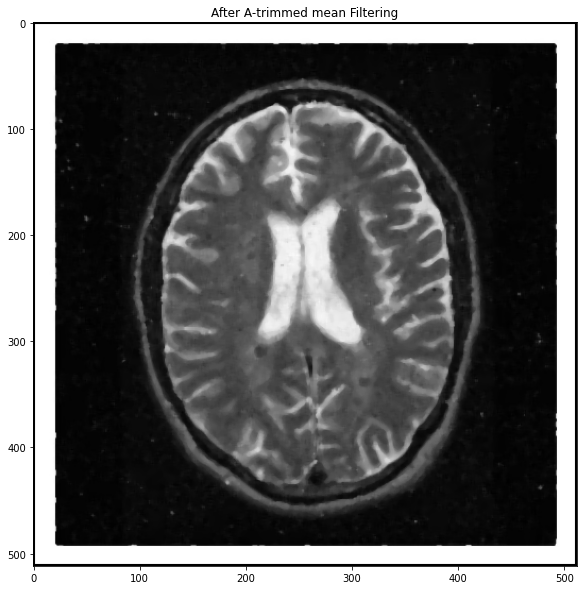

In [3]:
img = numpy.asarray(img)
enhance_img = enh_alphaTMean(img, 0.4)

# display the image
figsize = (10,10)
plt.figure(figsize=figsize)

plt.imshow(enhance_img, cmap='gray', vmin=0, vmax=255)
plt.title("After A-trimmed mean Filtering")